In [105]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [106]:
#create a Model class that is inherits neural network nn.Module
class Model(nn.Module):
    #input layer with 4 features of flower from our datasets --> 
    #choose to hidden Layer1(H1)(number of neurons in it)--> H2(n)--> 
    #output (3classes of flower)
    def __init__(self, in_features=4, h1=8,h2=9,OutputLayers=3):
        super().__init__() #instantiate our nn.module
        #fully connect 
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.out=nn.Linear(h2,OutputLayers)
        
    def forward(self,x):
        #rectified linear unit
        #start to layer one then move to layer 2
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        
        return x
        
        

In [107]:
#pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of model
model = Model()


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
#data frame
my_df=pd.read_csv(url)

In [110]:
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [111]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [112]:
#change the last column from string to int
#my_df['variety']=my_df['variety'].replace('Setos',0.0)
#my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
#my_df['variety']=my_df['variety'].replace('Virginica',2.0)

my_df['variety'] = my_df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})
# Handle future downcasting
my_df = my_df.infer_objects(copy=False)
# Split features and labels
X = my_df.drop('variety', axis=1)
#train test and split set X,Y
my_df

/var/folders/dg/9_6nhvf95kzgr9q1q5ptq6cw0000gn/T/ipykernel_72264/1234973239.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace({'Setosa': 0, 'Versicolor': 1, 'Virginica': 2})


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [113]:
#Convert its datatype to int64 (64-bit integer)
y = my_df['variety'].astype(np.int64)


In [114]:
#convert these to numpy arrays
X= X.values
y= y.values

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [116]:

#train test split testsize 20%, Train size is 80%
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=32)

In [117]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [118]:
#convert Y features to Long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [119]:
#set the criterion of model to measure the error, how far off the predictions are from the data
criterion=nn.CrossEntropyLoss()
#choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [120]:
# Train our model
# Epochs?(one run thru all the training data in our network), current we set spin 100 time
epochs = 100
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) #get predicted results

    # We want to measure the loss/error, it will be high at first
    loss = criterion(y_pred, y_train) #predicted values vs the y_train

    #keep Track of our losses
    losses.append(loss.detach().numpy())
    #print every 10 epochs
    if i%10==0:
        print(f'epochs:{i} and loss: {loss}')

    #do some back propogation by take the error rate of forward propagation and feed it back
    #thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs:0 and loss: 1.1699321269989014
epochs:10 and loss: 0.9570867419242859
epochs:20 and loss: 0.7980871796607971
epochs:30 and loss: 0.6327950358390808
epochs:40 and loss: 0.4386173486709595
epochs:50 and loss: 0.29045313596725464
epochs:60 and loss: 0.1778070032596588
epochs:70 and loss: 0.11584119498729706
epochs:80 and loss: 0.0893637090921402
epochs:90 and loss: 0.07752912491559982


Text(0.5, 0, 'Epoch')

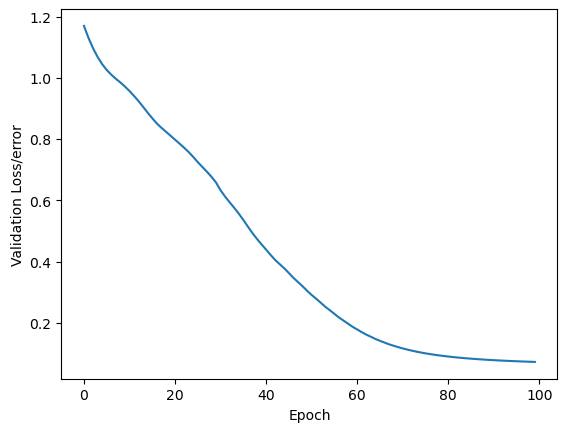

In [121]:
#graph the plot
plt.plot(range(epochs), losses)
plt.ylabel("Validation Loss/error")
plt.xlabel("Epoch")

In [122]:
# Evaluate Model on Test Data Set (Validate model on test set)
with torch.no_grad(): #turn off back propogation
    y_eval = model.forward(X_test) # X_test are features from out test set, y_eval wil be predictions
    loss = criterion(y_eval,y_test) # Find the loss or error

In [123]:
loss


tensor(0.0538)

In [124]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val= model.forward(data)

        if y_test[i]==0:
            x="Setsosa"
        elif y_test[i]==1:
            x="Versicolor"
        else:
            x="Virginica"
            
        print(f'{i+1}.) {str(y_val)} \t{x} \t {y_val.argmax().item()}')

        #let find out if this result is correct or not
        if y_val.argmax().item() ==y_test[i]:
            correct +=1
print(f'We got the result {correct} predicted correct!')

1.) tensor([-3.3646,  3.9392,  0.3720]) 	Versicolor 	 1
2.) tensor([  7.5572,   1.1015, -11.3347]) 	Setsosa 	 0
3.) tensor([  6.5957,   1.5027, -10.4091]) 	Setsosa 	 0
4.) tensor([-3.3331,  4.2594,  0.0623]) 	Versicolor 	 1
5.) tensor([-7.3782,  2.8087,  5.1605]) 	Virginica 	 2
6.) tensor([-7.3760,  3.9013,  4.2826]) 	Virginica 	 2
7.) tensor([  6.1971,   1.6470, -10.0047]) 	Setsosa 	 0
8.) tensor([  6.6383,   1.4348, -10.4031]) 	Setsosa 	 0
9.) tensor([-2.6753,  4.3091, -0.6392]) 	Versicolor 	 1
10.) tensor([  7.1875,   1.3812, -11.0965]) 	Setsosa 	 0
11.) tensor([-3.8318,  4.4027,  0.5246]) 	Versicolor 	 1
12.) tensor([-8.6807,  1.9994,  6.8923]) 	Virginica 	 2
13.) tensor([-2.0678,  3.8200, -0.7571]) 	Versicolor 	 1
14.) tensor([-1.0768,  4.3741, -2.2838]) 	Versicolor 	 1
15.) tensor([-7.4965,  2.6207,  5.3287]) 	Virginica 	 2
16.) tensor([-8.6136,  1.5508,  7.1186]) 	Virginica 	 2
17.) tensor([-3.7761,  3.6462,  0.9487]) 	Versicolor 	 1
18.) tensor([-6.7608,  2.7754,  4.5281]) 	Vir

In [125]:
#feed new data
new_iris1= torch.tensor([4.7, 3.2, 1.3, 0.2])

In [126]:
with torch.no_grad():
    print(model(new_iris1))

tensor([  6.8839,   1.2461, -10.5586])


In [127]:
#feed another new data
new_iris2= torch.tensor([5.8, 3.0, 5.2, 1.6])

In [128]:
with torch.no_grad():
    print(model(new_iris2))

tensor([-6.1493,  2.9669,  3.7741])


In [129]:
# Save and load NN model
torch.save(model.state_dict(),'awe_modle_iris.pt')

In [130]:
#load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('awe_modle_iris.pt'))

<All keys matched successfully>

In [131]:
#make sure its load correctly

In [ ]:
#ensure it load correctly
new_model.eval()

#convolutional Neural Network
#image filter and image kernel
#broken down to the matrix
#convolutional layer and RGB

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)